## Heart Failure Prediction using Logistic Regression

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
# Loading Dataset
data = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

In [4]:
# Visualise the data
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
# convert all the caregorial data columns of dataset to numeric data
#get all categorical columns
cat_columns = data.select_dtypes(['object']).columns

#convert all categorical columns to numeric
data[cat_columns] = data[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [6]:
# Visualise the data after converting to numeric data
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


In [7]:
# info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [8]:
# Check for the missing values in the dataset
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
# Counting values in each class
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [10]:
# Spliting dataset into input and output (i.e x and y)
X = data.iloc[:,:11]
y = data.iloc[:,11]

In [11]:
# visualise x and y
print("x : ",X)
print()
print("y : ",y)

x :       Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              0        140          289          0           0   
1     49    1              1        160          180          0           0   
2     37    0              0        130          283          0           1   
3     48    1              2        138          214          0           0   
4     54    0              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              3        110          264          0           0   
914   68    0              2        144          193          1           0   
915   57    0              2        130          131          0           0   
916   57    1              0        130          236          0           2   
917   38    0              1        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope 

In [12]:
# Scaling input data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [13]:
# Spliting x and y into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(688, 11)
(688,)
(230, 11)
(230,)


In [14]:
# visualise data
print("First five elements in X_train are:\n", x_train[:5])
print("Type of X_train:",type(x_train))
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in X_train are:
 [[ 1.96119341 -0.51595242 -0.53099236  1.49175234 -1.81843477 -0.55134134
   1.73366125 -0.89636694 -0.8235563   0.66852108  0.59607813]
 [-0.26633776 -0.51595242  1.81816902 -0.39972369  0.12989247 -0.55134134
   1.73366125 -0.46408682  1.21424608  0.4809019  -1.05211381]
 [-1.00884815 -0.51595242 -1.70557305 -0.12951283  0.18477493 -0.55134134
   1.73366125  2.01169929 -0.8235563  -0.83243239 -1.05211381]
 [-1.11492106 -0.51595242  0.64358833 -1.21035628  0.11159832 -0.55134134
  -0.74917967  0.9506481  -0.8235563  -0.83243239 -1.05211381]
 [ 0.47617263 -0.51595242  0.64358833 -1.21035628 -0.00731368 -0.55134134
  -0.74917967 -1.05355971 -0.8235563  -0.83243239  0.59607813]]
Type of X_train: <class 'numpy.ndarray'>
First five elements in y_train are:
 336    0
758    0
866    0
779    0
509    1
Name: HeartDisease, dtype: int64
Type of y_train: <class 'pandas.core.series.Series'>


In [15]:
# Check the dimensions of data
print ('The shape of X_train is: ' + str(x_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (688, 11)
The shape of y_train is: (688,)
We have m = 688 training examples


In [16]:
# convert pandas series to numpy ndarray
y_train = y_train.to_numpy()

In [17]:
y_train

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,

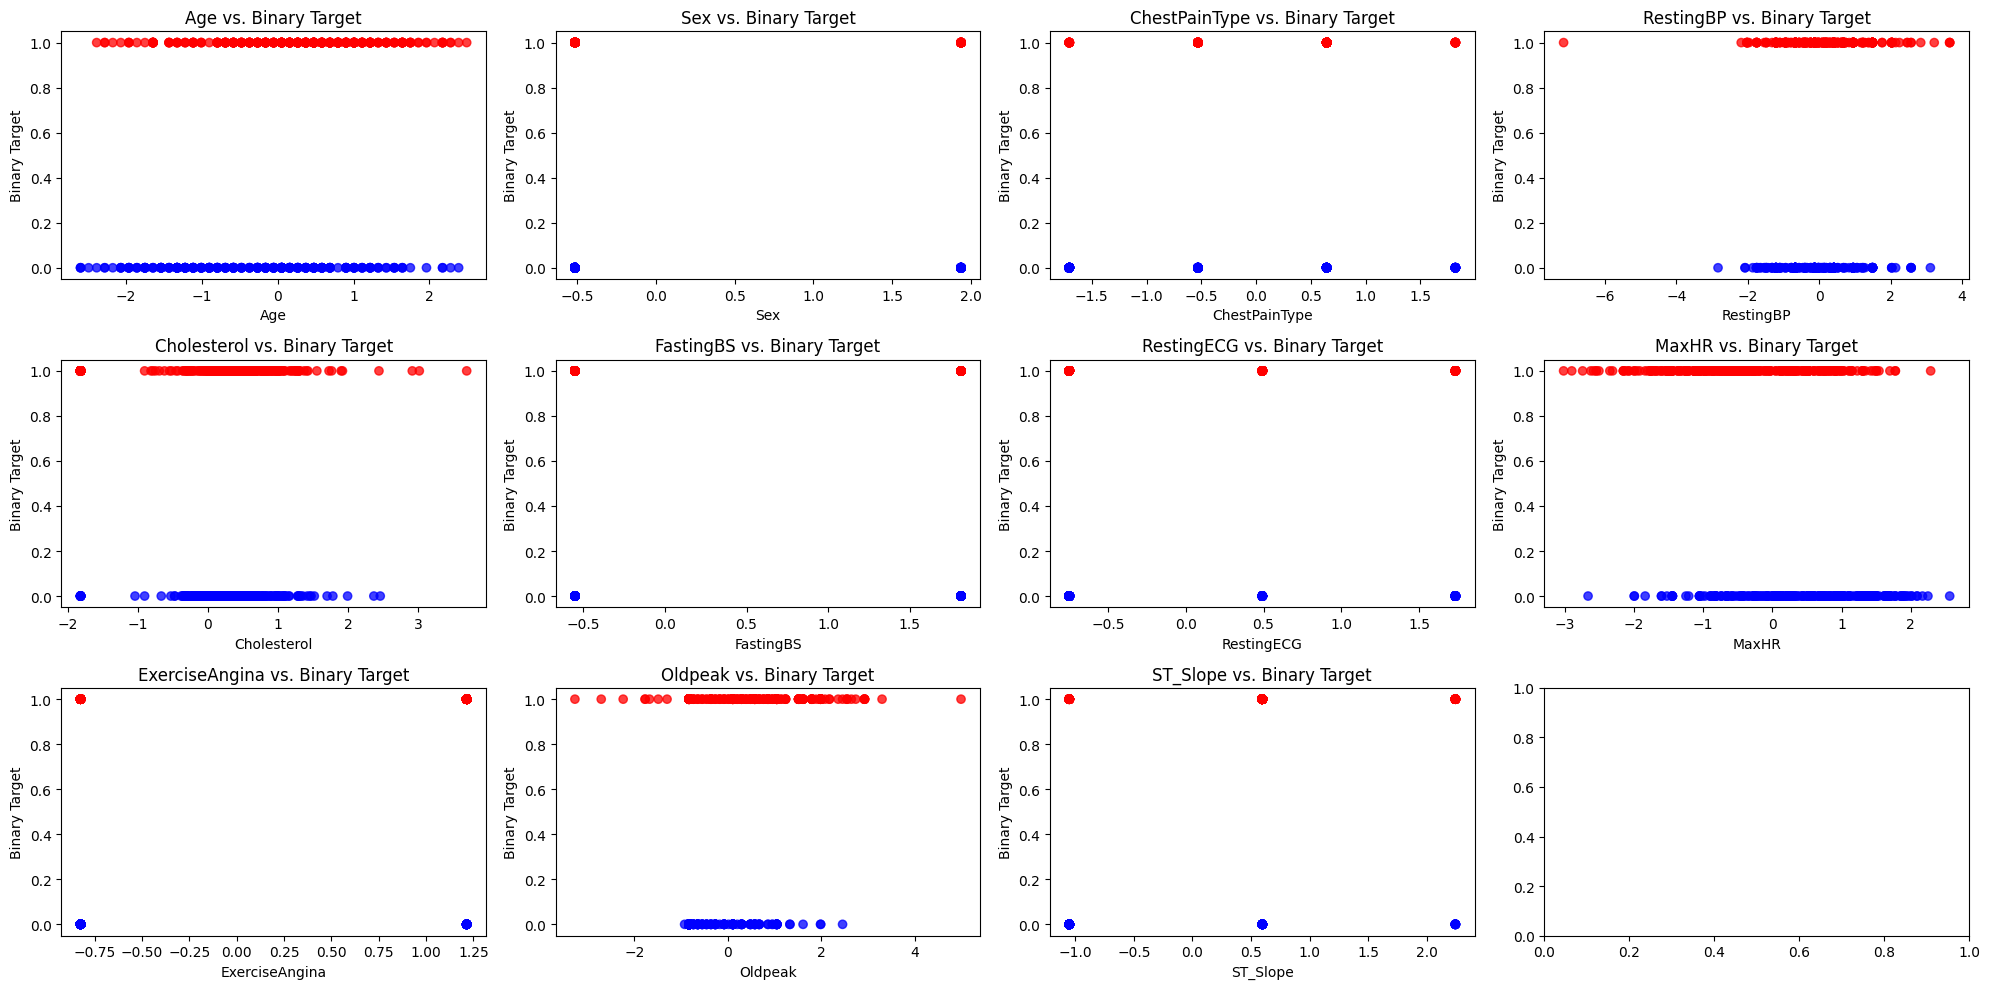

In [18]:
# Visualize data
# plotting each features against the output variable y

y_train = y_train.reshape(-1)

# list of feature names
features = ["Age", "Sex", "ChestPainType", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope"]
# Create subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 10))

# Plot each feature against the binary target
for k in range(11):  # We only have 8 subplots, adjust as necessary
    i = k // 4  # Row index
    j = k % 4   # Column index
    axes[i, j].scatter(x_train[:, k], y_train, c=y_train, cmap='bwr', alpha=0.75)
    axes[i, j].set_title(f'{features[k]} vs. Binary Target')
    axes[i, j].set_xlabel(features[k])
    axes[i, j].set_ylabel('Binary Target')
# Adjust layout
plt.tight_layout()
plt.show()

## Model Training

In [19]:
# Sigmoid Function
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [20]:
# testing sigmoid function
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid([ -2, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

sigmoid(0) = 0.5
sigmoid([ -2, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]


In [21]:
# Cost function for logistic regression
def compute_cost(X, y, w, b):
    m, n = X.shape

    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
    total_cost = cost/m

    return total_cost

In [22]:
# Compute and display cost with w initialized to zeroes
m, n = x_train.shape

initial_w = np.zeros(n)
initial_b = 0.
print(initial_w.shape)
cost = compute_cost(x_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

(11,)
Cost at initial w (zeros): 0.693


In [23]:
# Gradient for logistic regression
def compute_gradient(X, y, w, b): 
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m

    return dj_db, dj_dw

In [24]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
# print(X_train.shape)
dj_db, dj_dw = compute_gradient(x_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.04796511627906977
dj_dw at initial w (zeros):[-0.15211603793046194, 0.15137723113745688, -0.21951974032063976, -0.05796298164131786, 0.12723989352996432, -0.13168651887896296, -0.034436727965527617, 0.22463424499926618, -0.25965215365268757, -0.20209557692953492, -0.2861209464445251]


In [25]:
# Learning parameters using batch gradient descent
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history 

In [26]:
w_init = np.zeros(x_train.shape[1])
b_init = 0.
alpha = 0.01
num_iters = 2000

# Call gradient descent
w_final, b_final, J_history, w_history = gradient_descent(
    x_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, num_iters)

Iteration    0: Cost     0.69   
Iteration  200: Cost     0.42   
Iteration  400: Cost     0.38   
Iteration  600: Cost     0.37   
Iteration  800: Cost     0.36   
Iteration 1000: Cost     0.36   
Iteration 1200: Cost     0.35   
Iteration 1400: Cost     0.35   
Iteration 1600: Cost     0.35   
Iteration 1800: Cost     0.35   
Iteration 1999: Cost     0.35   


In [27]:
# Evaluating logistic regression
def predict(X, w, b): 
    
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)

    # Loop over each example
    for i in range(m):   
        z_wb = np.dot(X[i],w) 

        # Loop over each feature
        for j in range(n): 
            z_wb += 0
            
        # Add bias term     
        z_wb += b

        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb>0.5 else 0

    return p

In [28]:
#compute the accuracy on the training set
p = predict(x_train, w_final, b_final)
print('Train data Accuracy: %f'%(np.mean(p == y_train) * 100))

Train data Accuracy: 87.063953


In [29]:
#compute the accuracy on the testing set
p = predict(x_test, w_final, b_final)
print('Test data Accuracy: %f'%(np.mean(p == y_test) * 100))

Test data Accuracy: 80.000000


## Training the model using scikit learn

In [30]:
model = LogisticRegression()

model.fit(x_train, y_train)

m = x_train.shape[0]
predicted = np.zeros(m)

# predicted = model.predict(x_train)

print(model.coef_)
print(model.intercept_)

[[ 8.15904457e-02 -4.69612548e-01  4.43918964e-01  4.86393994e-04
  -3.95824310e-01  4.33502748e-01  3.50663263e-02 -4.75941908e-01
   6.51846817e-01  3.65658895e-01  9.57028191e-01]]
[0.37512349]


In [31]:
predicted = model.predict(x_train)
# accuracy on training data
accuracy = accuracy_score(y_train, predicted)

# Print accuracy
print("Accuracy:", accuracy*100)

Accuracy: 86.9186046511628


In [32]:
predicted = model.predict(x_test)
# accuracy on the testing data
accuracy = accuracy_score(y_test, predicted)

# Print accuracy
print("Accuracy:", accuracy*100)

Accuracy: 80.0
